In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.shape

(31647, 18)

In [5]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [8]:
df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [9]:
df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [10]:
df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [11]:
df['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [12]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


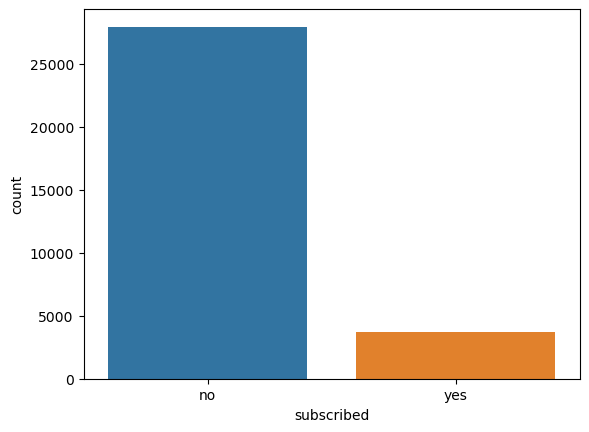

In [13]:
sns.countplot(x='subscribed', data=df)
plt.show()

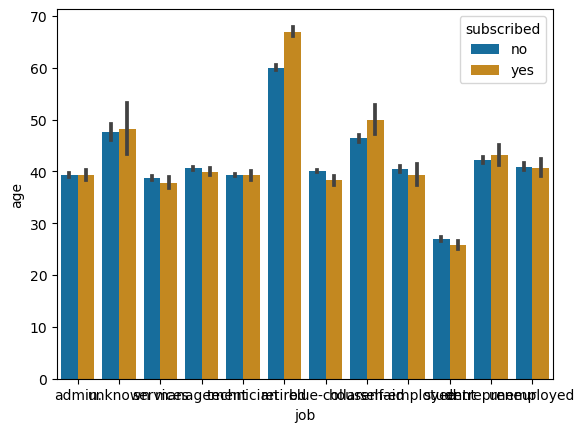

In [14]:
sns.barplot(x='job',y='age',data=df,palette='colorblind',hue='subscribed')
plt.show()

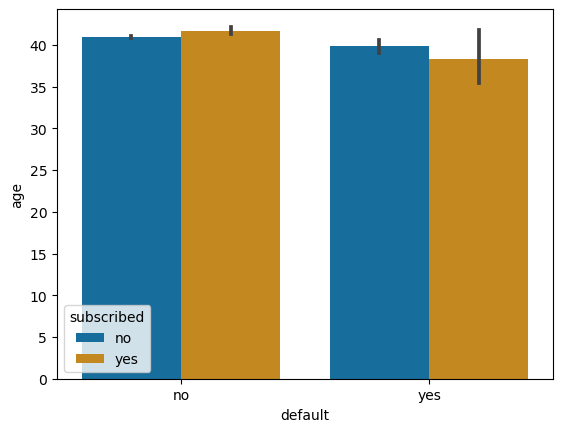

In [15]:
sns.barplot(x='default',y='age',data=df,palette='colorblind',hue='subscribed')
plt.show()

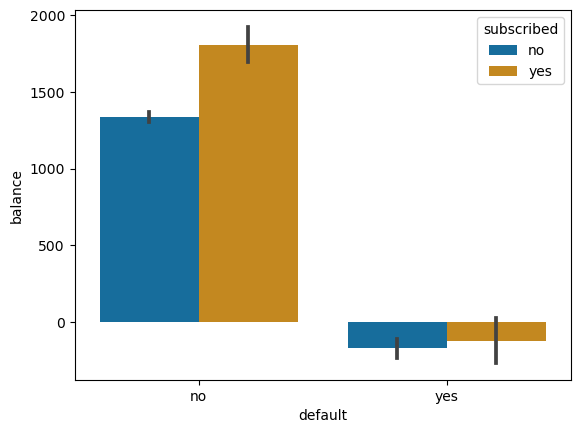

In [16]:
sns.barplot(x='default',y='balance',data=df,palette='colorblind',hue='subscribed')
plt.show()

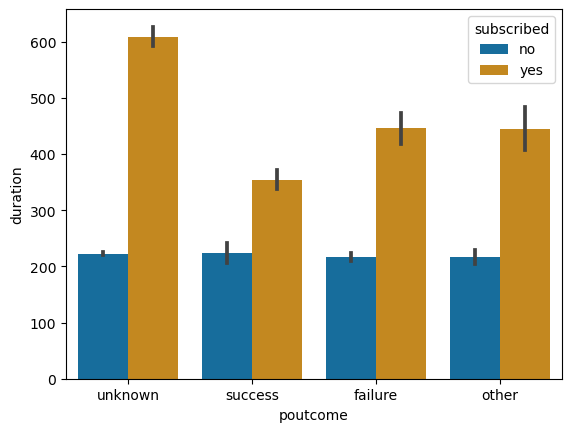

In [17]:
sns.barplot(x='poutcome',y='duration',data=df,palette='colorblind',hue='subscribed')
plt.show()

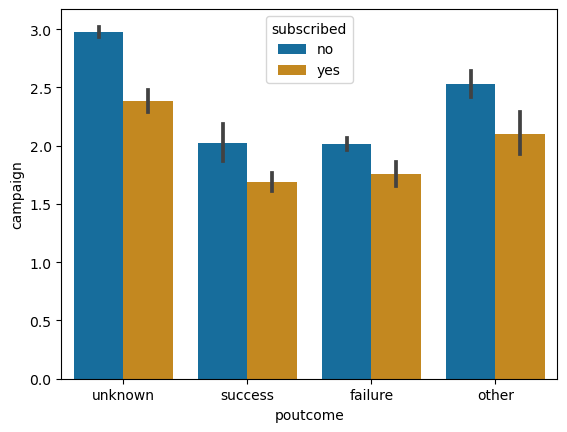

In [18]:
sns.barplot(x='poutcome',y='campaign',data=df,palette='colorblind',hue='subscribed')
plt.show()

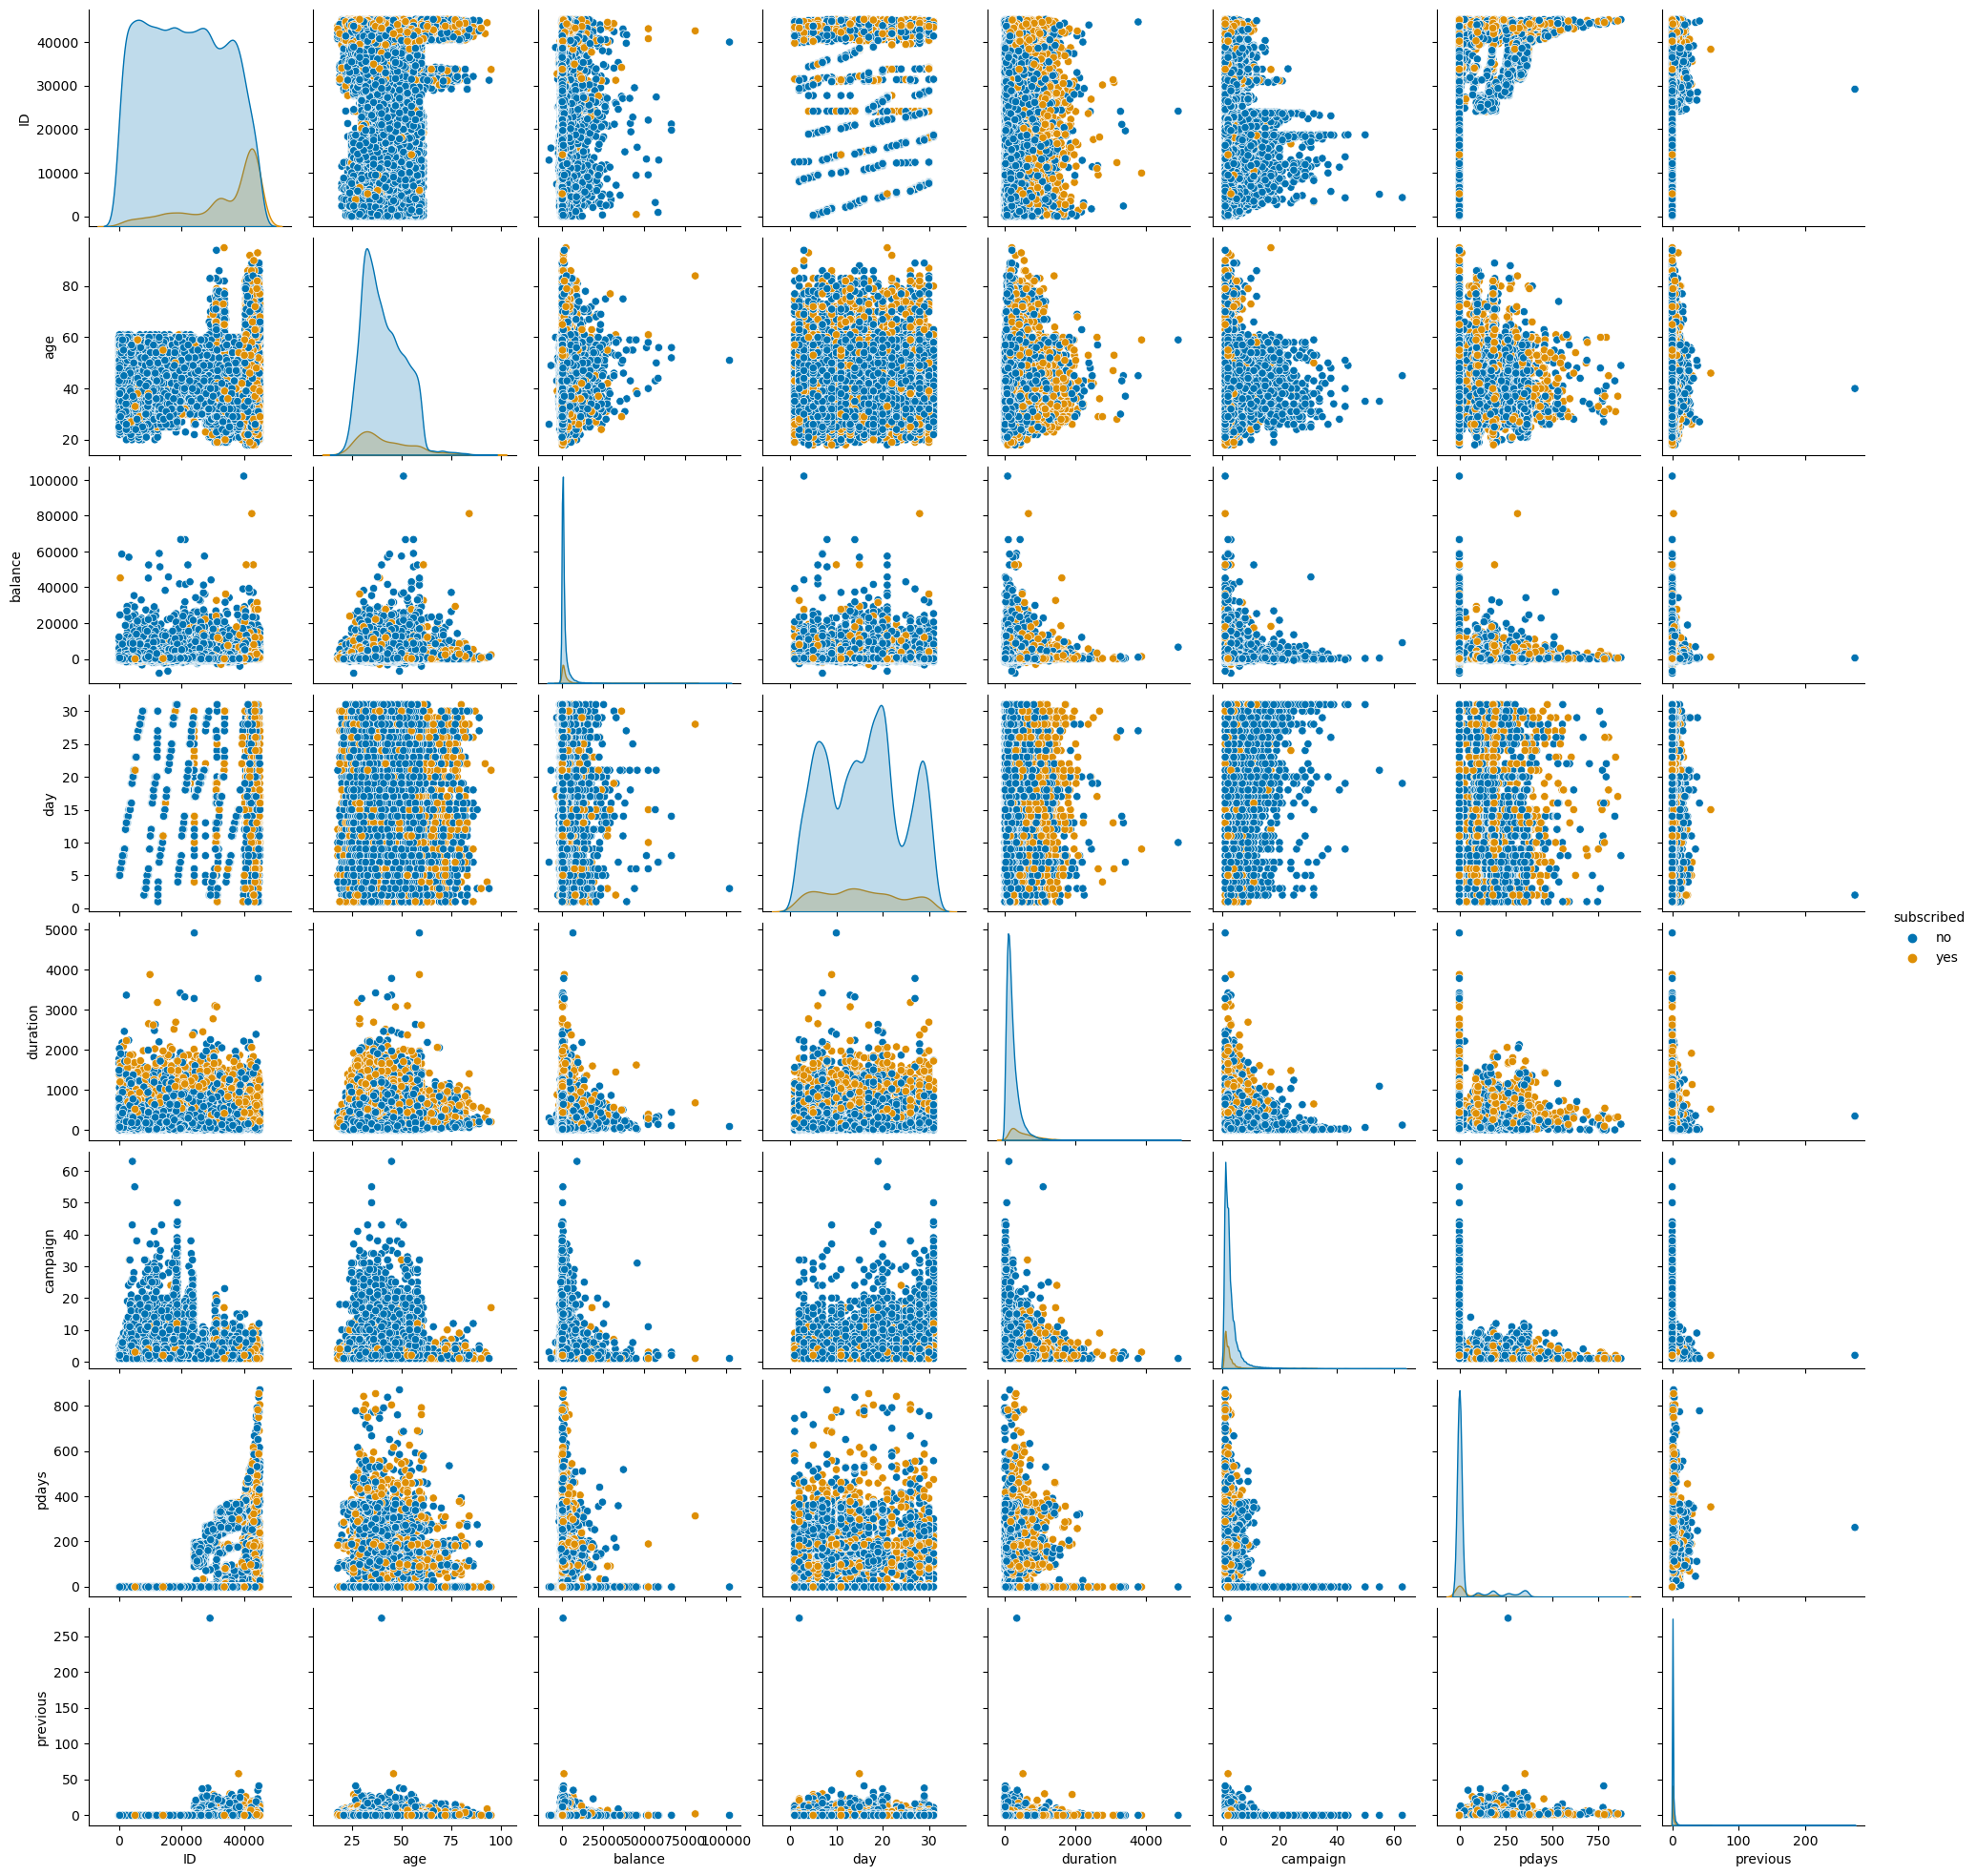

In [19]:
sns.pairplot(df, hue='subscribed', palette="colorblind")
plt.show()

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


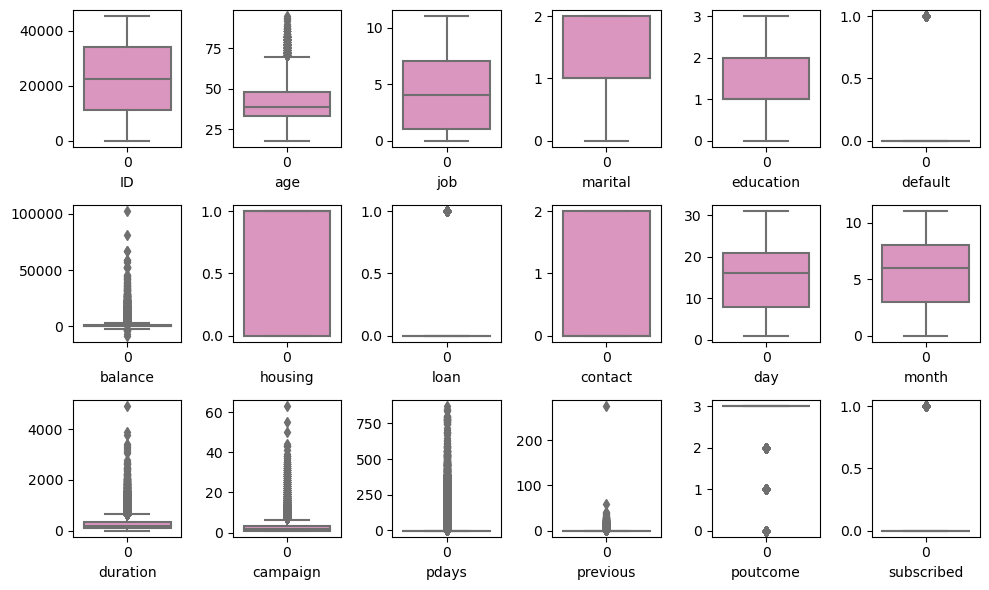

In [21]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 18:
        x=plt.subplot(3,6,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

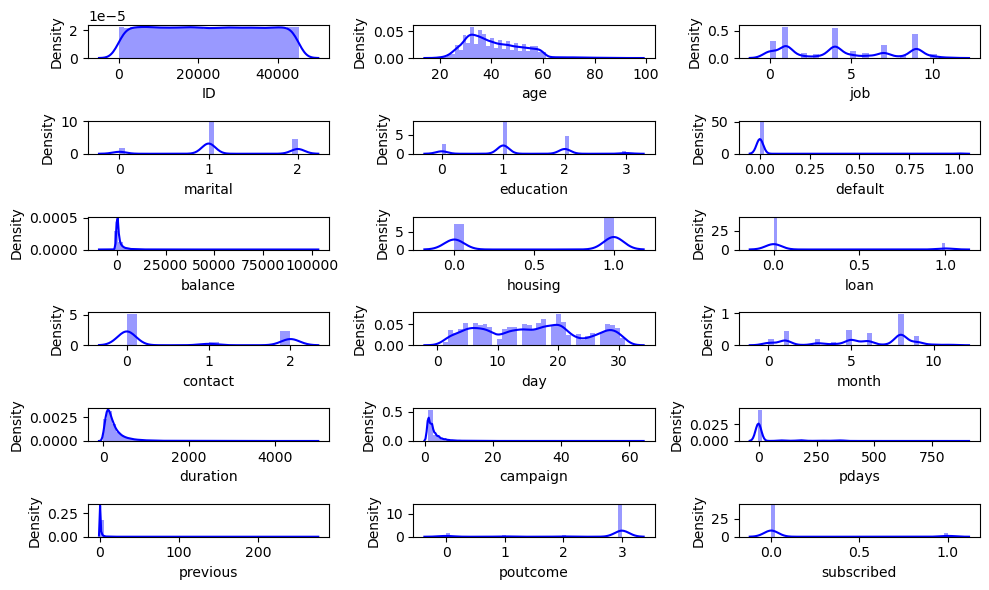

In [22]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 18:
        x=plt.subplot(6,3,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [23]:
df.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [24]:
#I did not normalzie data for balance and pdate as its converting negative values into NaN and negative values might be 
#important toward the final calculation

In [25]:
df['default']=np.sqrt(df['default'])
df['loan']=np.sqrt(df['loan'])
df['duration']=np.sqrt(df['duration'])
df['previous']=np.sqrt(df['previous'])

In [26]:
df.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      1.179872
campaign      4.873935
pdays         2.642374
previous      2.979019
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [27]:
df['campaign']=np.sqrt(df['campaign'])
df['duration']=np.sqrt(df['duration'])
df['previous']=np.sqrt(df['previous'])

In [28]:
df.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.379350
campaign      2.225079
pdays         2.642374
previous      1.871850
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [29]:
df['campaign']=np.sqrt(df['campaign'])

In [30]:
df.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.379350
campaign      1.435826
pdays         2.642374
previous      1.871850
poutcome     -1.996421
subscribed    2.377445
dtype: float64

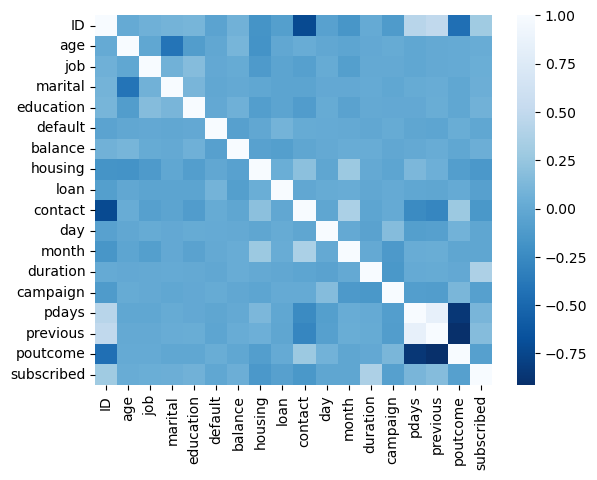

In [31]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues_r')
plt.show()

In [32]:
corr['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.371917
ID            0.296663
previous      0.170515
pdays         0.108290
education     0.066051
balance       0.050807
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
loan         -0.072266
poutcome     -0.080895
campaign     -0.082695
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

In [33]:
x = df.drop('subscribed', axis =1)
y = df['subscribed']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.271192,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.187933,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.380701,-0.102578,-0.408555,-0.458525,0.441777
1,1.377516,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.449397,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.768751,-0.102578,-0.408555,-0.458525,0.441777
2,-0.554001,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,-0.156159,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.241927,-0.906304,-0.408555,-0.458525,0.441777
3,1.636469,1.509911,-0.101755,-1.922374,1.034442,-0.137234,0.635055,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.019443,-0.906304,0.447299,2.212410,-0.576498
4,0.556606,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.411091,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.813438,-0.906304,-0.408555,-0.458525,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-0.450388,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.538289,-0.102578,-0.408555,-0.458525,0.441777
31643,1.347078,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.324903,-1.118201,2.273280,-0.716695,-1.299690,0.155405,1.003802,-0.102578,-0.408555,-0.458525,0.441777
31644,-0.218265,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.347358,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.510924,0.436335,-0.408555,-0.458525,0.441777
31645,1.223031,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.376088,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.869436,1.755308,2.994723,3.318747,-2.613048


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,2.838722,ID
1,1.289282,age
2,1.050542,job
3,1.234236,marital
4,1.068092,education
5,1.014350,default
6,1.036408,balance
7,1.219131,housing
8,1.036799,loan
9,2.548448,contact


In [36]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [38]:
y1.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0  at  0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [42]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.9484486873508353
[[7718  681]
 [ 183 8178]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      8399
         1.0       0.92      0.98      0.95      8361

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



In [43]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
plr = LR.predict(x_test)
print(accuracy_score(y_test,plr))
print(confusion_matrix(y_test,plr))
print(classification_report(y_test,plr))

0.8487470167064439
[[7013 1386]
 [1149 7212]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      8399
         1.0       0.84      0.86      0.85      8361

    accuracy                           0.85     16760
   macro avg       0.85      0.85      0.85     16760
weighted avg       0.85      0.85      0.85     16760



In [44]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.8960023866348449
[[7089 1310]
 [ 433 7928]]
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      8399
         1.0       0.86      0.95      0.90      8361

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760



In [45]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.9162887828162292
[[7446  953]
 [ 450 7911]]
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      8399
         1.0       0.89      0.95      0.92      8361

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760



In [46]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.8949880668257757
[[7493  906]
 [ 854 7507]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      8399
         1.0       0.89      0.90      0.90      8361

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.90      0.89      0.89     16760



In [47]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.9343675417661098
[[7712  687]
 [ 413 7948]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      8399
         1.0       0.92      0.95      0.94      8361

    accuracy                           0.93     16760
   macro avg       0.93      0.93      0.93     16760
weighted avg       0.93      0.93      0.93     16760



In [48]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.9591885441527447
[[7802  597]
 [  87 8274]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      8399
         1.0       0.93      0.99      0.96      8361

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



In [49]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.91640562 0.95336973 0.95229571 0.95721829 0.95435016]
0.946727903878298
Diff b/w Acc score and cross val score : 0.001720783472537346


In [50]:
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,plr) - score.mean())

[0.84310391 0.8605567  0.8485635  0.85670814 0.85311493]
0.8524094355129362
Diff b/w Acc score and cross val score : -0.003662418806492318


In [51]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.88928667 0.90163788 0.89582028 0.90432292 0.90127103]
0.8984677574695199
Diff b/w Acc score and cross val score : -0.002465370834675018


In [52]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.87075987 0.92284973 0.92204421 0.9274143  0.92499105]
0.9136118319350051
Diff b/w Acc score and cross val score : 0.002676950881224105


In [53]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.84659447 0.90861899 0.90208538 0.90512843 0.90225564]
0.8929365838295731
Diff b/w Acc score and cross val score : 0.0020514829962026138


In [54]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.88857066 0.94808914 0.94486709 0.94620961 0.94665235]
0.9348777705601924
Diff b/w Acc score and cross val score : -0.0005102287940825789


In [55]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.95686029 0.96554193 0.9637519  0.96858498 0.96455424]
0.9638586691889868
Diff b/w Acc score and cross val score : -0.00467012503624209


In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 1000], 
              'max_depth' : [0, 10, 20], 
              'n_jobs' : [-2, -1, 1], 
              'n_estimators' : [50, 100, 200, 300],}

In [58]:
GVC = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [59]:
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [61]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

94.37947494033413


In [62]:
import joblib
joblib.dump(Final_model,"Bank.pkl")

['Bank.pkl']

In [72]:
df1 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [73]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [74]:
df1.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [75]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = oe.fit_transform(df1[i].values.reshape(-1,1))
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [76]:
model = joblib.load("Bank.pkl")

prediction = model.predict(df1)
prediction

array([1., 1., 1., ..., 1., 1., 1.])

In [77]:
df1['subscribed'] = prediction
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0,1.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0,1.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0,1.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0,1.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0,1.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0,1.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0,1.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0,1.0
